In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.math import confusion_matrix
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
(X_train, Y_train) , (X_test, Y_test) = mnist.load_data()

In [3]:
print(f"{X_train.shape} , {Y_train.shape} , {X_test.shape} , {Y_test.shape}")

(60000, 28, 28) , (60000,) , (10000, 28, 28) , (10000,)


In [4]:
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [5]:
print(X_train[4].shape)

(28, 28)


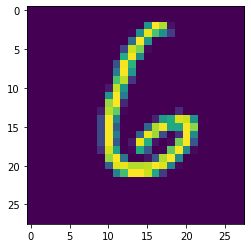

In [6]:
plt.imshow(X_train[32])
plt.show()

In [7]:
print(Y_train[32])

6


In [8]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
print(X_train[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') 
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_history = model.fit(X_train, Y_train, epochs=5, validation_split=0.2, batch_size=64)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8601 - loss: 0.4754 - val_accuracy: 0.9796 - val_loss: 0.0724
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9809 - loss: 0.0606 - val_accuracy: 0.9857 - val_loss: 0.0496
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9878 - loss: 0.0423 - val_accuracy: 0.9855 - val_loss: 0.0500
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9901 - loss: 0.0307 - val_accuracy: 0.9865 - val_loss: 0.0472
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.9874 - val_loss: 0.0436


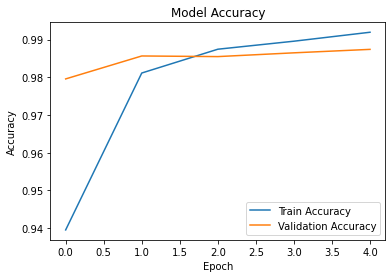

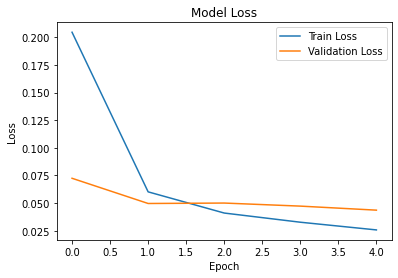

In [14]:
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0364
Test Loss: 0.03147163242101669, Test Accuracy: 0.9894000291824341


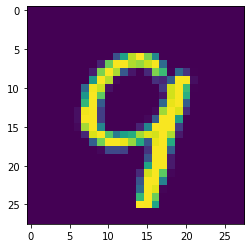

In [16]:
plt.imshow(X_test[16])
plt.show()

In [17]:
print(Y_test[16])

9


In [18]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
print(Y_pred[16])

[8.5070762e-10 6.4860189e-13 3.1031471e-09 2.0229930e-08 2.2110071e-06
 3.8152401e-09 1.1873681e-12 7.0347903e-07 9.4899002e-07 9.9999607e-01]


In [20]:
print(np.argmax(Y_pred[0]))

7


In [21]:
Y_pred_vals = [np.argmax(i) for i in Y_pred]
print(Y_pred_vals)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [22]:
confusion_matrix = confusion_matrix(Y_test, Y_pred_vals)
print(confusion_matrix)

tf.Tensor(
[[ 973    0    2    0    0    0    3    1    1    0]
 [   0 1132    1    1    0    0    1    0    0    0]
 [   2    0 1021    0    2    0    0    6    1    0]
 [   0    1    2  998    0    6    0    1    2    0]
 [   0    3    1    0  965    0    0    1    2   10]
 [   1    0    1    4    0  882    1    1    0    2]
 [   3    2    1    0    2    2  947    0    1    0]
 [   0    3    3    0    0    1    0 1018    0    3]
 [   4    0    1    1    0    1    1    3  958    5]
 [   2    2    0    0    0    3    0    2    0 1000]], shape=(10, 10), dtype=int32)


Text(0.5, 87.0000000000001, 'Predicted values')

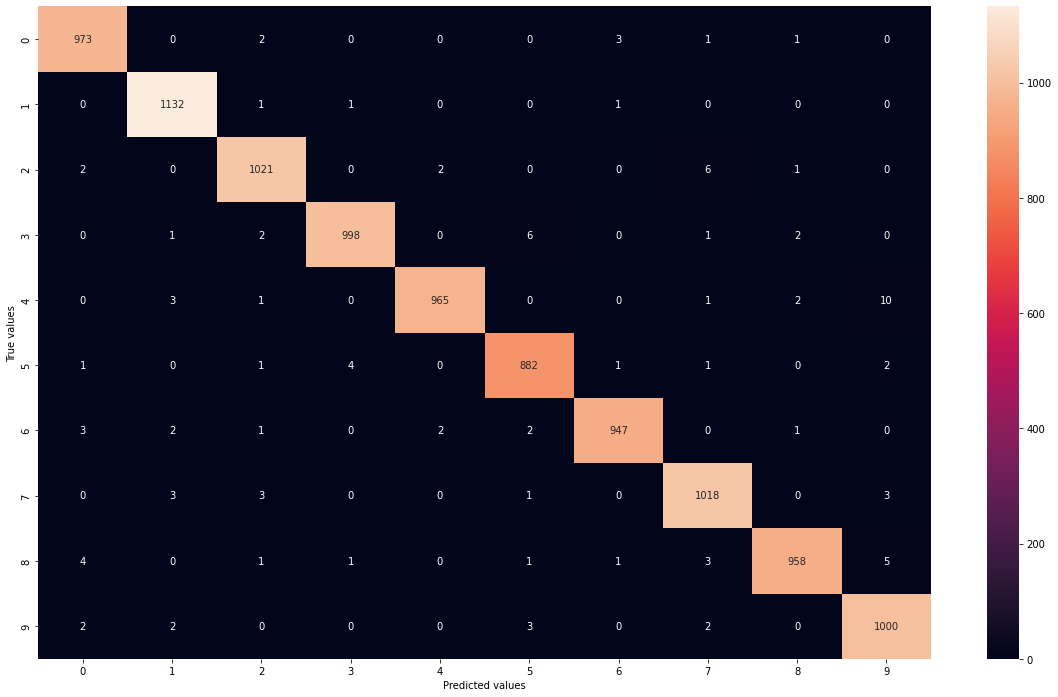

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.ylabel('True values')
plt.xlabel('Predicted values')

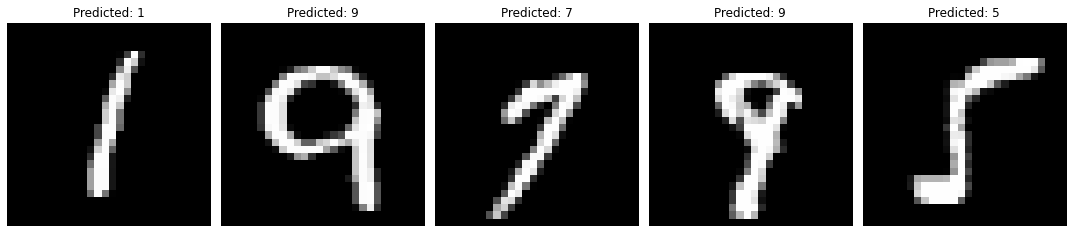

In [24]:
random_indices = np.random.choice(len(X_test), size=5, replace=False)

plt.figure(figsize=(15, 5))
for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {Y_pred_vals[index]}')
    plt.axis('off')
plt.tight_layout()
plt.show()